In [178]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout,TimeDistributed, Conv1D, MaxPooling1D, Flatten, Reshape
from keras.regularizers import l2
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Train Test Split

In [2]:
raw = pd.read_csv("datasets/all_features.csv")
raw = raw.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL","EFFRVOL_DIFF"
                          ,"OBFR_DIFF","OBFRVOL_DIFF","SP500_UNNORM", "SOFR_DIFF", "SOFRVOL_DIFF"]).dropna()

In [3]:
train = raw[raw["date"] < "2018-00-00"]

In [4]:
test = raw[raw["date"] > "2018-00-00"]

In [5]:
len(train), len(test)

(1711, 784)

In [6]:
train.to_csv("datasets/train.csv")
test.to_csv("datasets/test.csv")

In [7]:
X_train = train.drop(columns = ["SP500_NORM", "date"]).values
y_train = train["SP500_NORM"].values

In [8]:
X_test = test.drop(columns = ["SP500_NORM", "date"]).values
y_test = test["SP500_NORM"].values

In [212]:
def split_sequence(X, y, n_steps):
    new_X = []
    new_y = []
    for i in range(1, len(X)):
        # find the end of this pattern
        end_ix = i + n_steps - 1
        # check if we are beyond the sequence
        if end_ix > len(X)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = np.hstack([X[i:end_ix+1], y[i-1:end_ix].reshape((-1,1))]), y[end_ix]
        new_X.append(seq_x)
        new_y.append(seq_y)
    return array(new_X), array(new_y)

In [61]:
def plot_train_stats(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## DNN Baseline

In [83]:
n_steps = 5
lstm_size = 50
weight_decay = 1e-2
lr = 1e-4
epochs = 200

In [84]:
model = Sequential()
model.add(Dense(1024, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(1024, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(256, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(256, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(64, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(64, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(1, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(opt, loss='mse')
# fit model
history = model.fit(X_train, y_train,
          epochs=epochs,  batch_size=64, shuffle=True,
          validation_data=(X_test, y_test))

Epoch 1/200
27/27 [==============================] - 1s 34ms/step - loss: 21.5933 - val_loss: 21.2238
Epoch 2/200
27/27 [==============================] - 1s 27ms/step - loss: 20.6290 - val_loss: 20.9625
Epoch 3/200
27/27 [==============================] - 1s 27ms/step - loss: 20.1106 - val_loss: 20.2305
Epoch 4/200
27/27 [==============================] - 1s 30ms/step - loss: 19.6236 - val_loss: 19.8079
Epoch 5/200
27/27 [==============================] - 1s 35ms/step - loss: 19.1183 - val_loss: 19.2879
Epoch 6/200
27/27 [==============================] - 1s 30ms/step - loss: 18.6007 - val_loss: 18.7607
Epoch 7/200
27/27 [==============================] - 1s 31ms/step - loss: 18.0780 - val_loss: 18.2126
Epoch 8/200
27/27 [==============================] - 1s 32ms/step - loss: 17.5556 - val_loss: 17.6875
Epoch 9/200
27/27 [==============================] - 1s 30ms/step - loss: 17.0372 - val_loss: 17.1602
Epoch 10/200
27/27 [==============================] - 1s 32ms/step - loss: 16.5258

27/27 [==============================] - 1s 28ms/step - loss: 1.7062 - val_loss: 2.4276
Epoch 82/200
27/27 [==============================] - 1s 30ms/step - loss: 1.6515 - val_loss: 2.3756
Epoch 83/200
27/27 [==============================] - 1s 27ms/step - loss: 1.5985 - val_loss: 2.3278
Epoch 84/200
27/27 [==============================] - 1s 30ms/step - loss: 1.5472 - val_loss: 2.2846
Epoch 85/200
27/27 [==============================] - 1s 31ms/step - loss: 1.4975 - val_loss: 2.2371
Epoch 86/200
27/27 [==============================] - 1s 40ms/step - loss: 1.4493 - val_loss: 2.1921
Epoch 87/200
27/27 [==============================] - 1s 35ms/step - loss: 1.4026 - val_loss: 2.1491
Epoch 88/200
27/27 [==============================] - 1s 32ms/step - loss: 1.3574 - val_loss: 2.1088
Epoch 89/200
27/27 [==============================] - 1s 35ms/step - loss: 1.3135 - val_loss: 2.0667
Epoch 90/200
27/27 [==============================] - 1s 40ms/step - loss: 1.2711 - val_loss: 2.0274
Epo

27/27 [==============================] - 1s 32ms/step - loss: 0.1293 - val_loss: 1.0760
Epoch 162/200
27/27 [==============================] - 1s 33ms/step - loss: 0.1258 - val_loss: 1.0675
Epoch 163/200
27/27 [==============================] - 1s 39ms/step - loss: 0.1224 - val_loss: 1.0805
Epoch 164/200
27/27 [==============================] - 1s 38ms/step - loss: 0.1192 - val_loss: 1.0687
Epoch 165/200
27/27 [==============================] - 1s 33ms/step - loss: 0.1161 - val_loss: 1.0775
Epoch 166/200
27/27 [==============================] - 1s 29ms/step - loss: 0.1130 - val_loss: 1.0723
Epoch 167/200
27/27 [==============================] - 1s 32ms/step - loss: 0.1102 - val_loss: 1.0719
Epoch 168/200
27/27 [==============================] - 1s 32ms/step - loss: 0.1074 - val_loss: 1.0676
Epoch 169/200
27/27 [==============================] - 1s 33ms/step - loss: 0.1047 - val_loss: 1.0667
Epoch 170/200
27/27 [==============================] - 1s 34ms/step - loss: 0.1022 - val_loss: 1

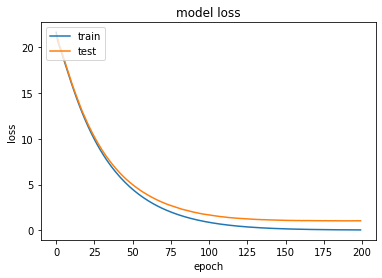

In [87]:
plot_train_stats(history)

## LSTM Baseline

In [213]:
n_steps = 5
lstm_size = 200
weight_decay = 1e-2
lr = 1e-3
epochs = 200

In [214]:
n_features = X_train.shape[1] + 1

In [215]:
X_train_splited, y_train_splited = split_sequence(X_train, y_train, n_steps)

In [216]:
X_test_splited, y_test_splited = split_sequence(X_test, y_test, n_steps)

In [ ]:
model = Sequential()
model.add(Dense(1024))
model.add(LSTM(lstm_size, activation='relu', input_shape=(n_steps, 300), return_sequences=True,
               kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
               bias_regularizer=l2(weight_decay)))
model.add(Dense(256, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(16, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
model.add(Dense(1, kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay)))
opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(opt, loss='mse')
# fit model
history = model.fit(X_train_splited, y_train_splited,
          epochs=epochs,  batch_size=64, shuffle=True,
          validation_data=(X_test_splited, y_test_splited))

Epoch 1/200
27/27 [==============================] - 3s 102ms/step - loss: 11.9273 - val_loss: 9.9481
Epoch 2/200
27/27 [==============================] - 2s 86ms/step - loss: 6.4157 - val_loss: 6.4695
Epoch 3/200
27/27 [==============================] - 2s 87ms/step - loss: 4.3251 - val_loss: 5.0559
Epoch 4/200
27/27 [==============================] - 2s 85ms/step - loss: 3.3733 - val_loss: 4.3026
Epoch 5/200
27/27 [==============================] - 2s 90ms/step - loss: 2.8094 - val_loss: 3.7996
Epoch 6/200
27/27 [==============================] - 3s 115ms/step - loss: 2.4237 - val_loss: 3.4144
Epoch 7/200
27/27 [==============================] - 3s 97ms/step - loss: 2.1370 - val_loss: 3.1599
Epoch 8/200
15/27 [===============>..............] - ETA: 1s - loss: 1.9549

## Stacked LSTM 

In [209]:
n_steps = 5
lstm_size = 200
weight_decay = 1e-2
lr = 1e-4
epochs = 200

In [210]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape = (20,50)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

In [211]:
history = model.fit(X_train_splited, y_train_splited,
          epochs=epochs,  batch_size=64, shuffle=True,
          validation_data=(X_test_splited, y_test_splited))

Epoch 1/200
27/27 [==============================] - 1s 51ms/step - loss: 1.3438 - val_loss: 4.3225
Epoch 2/200
27/27 [==============================] - 1s 19ms/step - loss: 0.0988 - val_loss: 5.1925
Epoch 3/200
27/27 [==============================] - 1s 19ms/step - loss: 0.0426 - val_loss: 5.1918
Epoch 4/200
27/27 [==============================] - 1s 20ms/step - loss: 0.0384 - val_loss: 4.9664
Epoch 5/200
27/27 [==============================] - 1s 23ms/step - loss: 0.0305 - val_loss: 4.8114
Epoch 6/200
27/27 [==============================] - 0s 18ms/step - loss: 0.0240 - val_loss: 4.8989
Epoch 7/200
27/27 [==============================] - 1s 20ms/step - loss: 0.0200 - val_loss: 5.0878
Epoch 8/200
27/27 [==============================] - 1s 20ms/step - loss: 0.0156 - val_loss: 5.0386
Epoch 9/200
27/27 [==============================] - 0s 18ms/step - loss: 0.0141 - val_loss: 4.9850
Epoch 10/200
27/27 [==============================] - 1s 19ms/step - loss: 0.0142 - val_loss: 4.9261

27/27 [==============================] - 1s 19ms/step - loss: 0.0069 - val_loss: 4.9350
Epoch 83/200
27/27 [==============================] - 0s 17ms/step - loss: 0.0071 - val_loss: 5.0695
Epoch 84/200
27/27 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 5.0356
Epoch 85/200
27/27 [==============================] - 1s 21ms/step - loss: 0.0071 - val_loss: 5.0805
Epoch 86/200
27/27 [==============================] - 1s 22ms/step - loss: 0.0073 - val_loss: 5.1835
Epoch 87/200
27/27 [==============================] - 1s 19ms/step - loss: 0.0073 - val_loss: 5.0808
Epoch 88/200
27/27 [==============================] - 0s 18ms/step - loss: 0.0073 - val_loss: 5.0595
Epoch 89/200
27/27 [==============================] - 1s 20ms/step - loss: 0.0072 - val_loss: 5.2006
Epoch 90/200
27/27 [==============================] - 0s 18ms/step - loss: 0.0071 - val_loss: 5.1526
Epoch 91/200
27/27 [==============================] - 1s 20ms/step - loss: 0.0068 - val_loss: 5.1136
Epo

KeyboardInterrupt: 

In [ ]:
plot_train_stats(history)

## Conv LSTM

In [179]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))

model.add(Dropout(0.2))
model.add(Reshape((-1,1)))
model.add(LSTM(50, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')